# Definição de problema

O objetivo consiste em prever a presença de doença cardíaca com base em várias características dos pacientes, como idade, sexo, pressão sanguínea, colesterol, entre outros.

Hipótese: Alguns atributos podem ter maior peso na predição da doença cardíaca do que outros.

# Configuração para não exibir os warnings

In [31]:
import warnings
warnings.filterwarnings("ignore")

# Imports necessários

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as ms
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Definição de atributos







*   age (Idade em anos): A idade do paciente em anos.

*   sex (Sexo): O sexo do paciente, onde 1 representa masculino e 0 representa feminino.

*   chest pain type (Tipo de dor no peito): O tipo de dor no peito relatada pelo paciente, codificado de 1 a 4, onde:
    *   1: Angina típica
    *   2: Angina atípica
    *   3: Dor não anginal
    *   4: Assintomático

*   resting bp s (Pressão sanguínea em repouso): A pressão arterial sistólica em mm Hg enquanto o paciente está em repouso.

*   serum cholesterol (Colesterol sérico): O nível de colesterol sérico do paciente em mg/dL.

*   fasting blood sugar (Açúcar no sangue em jejum): O nível de açúcar no sangue em jejum do paciente, onde 1 indica um nível de açúcar no sangue acima de 120 mg/dL e 0 indica um nível de açúcar no sangue abaixo ou igual a 120 mg/dL.

*   resting ecg (Eletrocardiograma em repouso): Os resultados do eletrocardiograma em repouso, codificados de 0 a 2, onde:

    *   0: Normal
    *   1: Anormalidade de onda ST-T (inversões da onda T e/ou elevação ou depressão do segmento ST em > 0,05 mV)
    *   2: Provável ou definitiva hipertrofia ventricular esquerda por critérios de Estes

*   max heart rate (Máximo de frequência cardíaca alcançada): A máxima frequência cardíaca alcançada pelo paciente (bpm).

*   exercise angina (Angina induzida pelo exercício): Se o paciente teve angina induzida pelo exercício, onde 1 indica sim e 0 indica não.

*   oldpeak (Depressão de ST antiga): Depressão de ST induzida pelo exercício em relação ao repouso.

*   ST slope (Inclinação de ST): A inclinação do segmento ST durante o pico do exercício, codificada de 0 a 2, onde:

    *   0: Inclinação ascendente
    *   1: Plana
    *   2: Inclinação descendente


*   target (Alvo): A presença de doença cardíaca, onde 1 indica presença de doença cardíaca e 0 indica ausência de doença cardíaca.

# Análise de dados

In [33]:
# Carga de dataframe

filename = 'https://raw.githubusercontent.com/henriquesamuel/MachineLearning/main/heart_statlog_cleveland_hungary_final.csv' # path do github
df = pd.read_csv(filename)

# renomeando colunas (cabeçalho)
df.columns = ['Idade', 'Sexo', 'TipoDor', 'PressaoSangueRep', 'Colesterol_Serico', 'Acucar_sangue_jejum', 'EletrocardiogramaRep', 'FreqCardiacaMax', 'AnginoExercicio', 'InclinacaoST' ,'Depressão_ST_antiga' ,'Alvo']

# Primeiras 5 linhas
df.head()

,Idade,Sexo,TipoDor,PressaoSangueRep,Colesterol_Serico,Acucar_sangue_jejum,EletrocardiogramaRep,FreqCardiacaMax,AnginoExercicio,InclinacaoST,Depressão_ST_antiga,Alvo
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


# Informações Gerais e Estatísticas Descritivas

In [34]:
# Mostra as dimensões do dataframe
df.shape

(1190, 12)

In [35]:
# Mostra as informações do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Idade                 1190 non-null   int64  
 1   Sexo                  1190 non-null   int64  
 2   TipoDor               1190 non-null   int64  
 3   PressaoSangueRep      1190 non-null   int64  
 4   Colesterol_Serico     1190 non-null   int64  
 5   Acucar_sangue_jejum   1190 non-null   int64  
 6   EletrocardiogramaRep  1190 non-null   int64  
 7   FreqCardiacaMax       1190 non-null   int64  
 8   AnginoExercicio       1190 non-null   int64  
 9   InclinacaoST          1190 non-null   float64
 10  Depressão_ST_antiga   1190 non-null   int64  
 11  Alvo                  1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [36]:
# Verificando valores missing
df.isnull().sum()

Idade                   0
Sexo                    0
TipoDor                 0
PressaoSangueRep        0
Colesterol_Serico       0
Acucar_sangue_jejum     0
EletrocardiogramaRep    0
FreqCardiacaMax         0
AnginoExercicio         0
InclinacaoST            0
Depressão_ST_antiga     0
Alvo                    0
dtype: int64

Não existem valores faltantes neste dataset

In [38]:
# Resumo estatístico do dataframe
df.describe()

,Idade,Sexo,TipoDor,PressaoSangueRep,Colesterol_Serico,Acucar_sangue_jejum,EletrocardiogramaRep,FreqCardiacaMax,AnginoExercicio,InclinacaoST,Depressão_ST_antiga,Alvo
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


# Feature selection

In [39]:
from sklearn.model_selection import train_test_split

# Selecionar atributos com base nos resultados dos métodos de seleção de características
# Vamos usar os atributos selecionados pelos três métodos
atributos_selecionados = ['Idade', 'TipoDor', 'PressaoSangueRep', 'FreqCardiacaMax', 'InclinacaoST']

# Separar os dados em features (X) e alvo (y) usando apenas os atributos selecionados
X = df[atributos_selecionados]
y = df['Alvo']

# Dividir os dados em conjunto de treino e conjunto de teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar o tamanho dos conjuntos
print("Tamanho do conjunto de treino:", X_treino.shape[0])
print("Tamanho do conjunto de teste:", X_teste.shape[0])


 SelecKBest

In [40]:
from sklearn.feature_selection import SelectKBest, f_classif

# Número original de atributos
num_original_atributos = len(X.columns)

# Definindo o número de características a serem selecionadas
k_features = 5

# Aplicando o SelectKBest com o teste ANOVA
selector = SelectKBest(score_func=f_classif, k=k_features)
X_selected = selector.fit_transform(X, y)

# Número reduzido de atributos
num_reduzido_atributos = X_selected.shape[1]

# Obtendo os índices das características selecionadas
selected_indices = selector.get_support(indices=True)

# Obtendo os nomes das características selecionadas
selected_features = X.columns[selected_indices]

# Scores dos atributos originais
scores = selector.scores_

# Exibindo as informações
print("Número original de atributos:", num_original_atributos)
print("Número reduzido de atributos:", num_reduzido_atributos)
print("Atributos originais:")
for i, col in enumerate(X.columns):
    print(f"{i+1}. {col} - Score: {scores[i]}")
print("\nAtributos selecionados:")
print(selected_features)


Número original de atributos: 11
Número reduzido de atributos: 5
Atributos originais:
1. Idade - Score: 87.5801576126087
2. Sexo - Score: 127.45003650477256
3. TipoDor - Score: 319.07266055052827
4. PressaoSangueRep - Score: 17.774983624045202
5. Colesterol_Serico - Score: 48.661642317714595
6. Acucar_sangue_jejum - Score: 58.533162916237494
7. EletrocardiogramaRep - Score: 6.3752018041145
8. FreqCardiacaMax - Score: 244.70425915457642
9. AnginoExercicio - Score: 358.49258024986034
10. InclinacaoST - Score: 224.11842731825317
11. Depressão_ST_antiga - Score: 408.0006915889481

Atributos selecionados:
Index(['TipoDor', 'FreqCardiacaMax', 'AnginoExercicio', 'InclinacaoST',
       'Depressão_ST_antiga'],
      dtype='object')


Algoritmo de Regressão Logística

In [41]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

# Criando o modelo de Regressão Logística
logistic_regression_model = LogisticRegression(max_iter=1000)

# Aplicando o SelectFromModel
selector = SelectFromModel(estimator=logistic_regression_model)
X_selected = selector.fit_transform(X, y)

# Obtendo as máscaras de características selecionadas
selected_mask = selector.get_support()

# Obtendo os nomes das características selecionadas
selected_features = X.columns[selected_mask]

# Número original de atributos
num_original_atributos = len(X.columns)

# Número reduzido de atributos
num_reduzido_atributos = X_selected.shape[1]

# Exibindo as informações
print("Número original de atributos:", num_original_atributos)
print("Número reduzido de atributos:", num_reduzido_atributos)
print("Atributos originais:")
for i, col in enumerate(X.columns):
    print(f"{i+1}. {col}")
print("\nAtributos selecionados:")
print(selected_features)


Número original de atributos: 11
Número reduzido de atributos: 5
Atributos originais:
1. Idade
2. Sexo
3. TipoDor
4. PressaoSangueRep
5. Colesterol_Serico
6. Acucar_sangue_jejum
7. EletrocardiogramaRep
8. FreqCardiacaMax
9. AnginoExercicio
10. InclinacaoST
11. Depressão_ST_antiga

Atributos selecionados:
Index(['Sexo', 'TipoDor', 'Acucar_sangue_jejum', 'AnginoExercicio',
       'Depressão_ST_antiga'],
      dtype='object')


ExtraTrees

In [42]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier

# Criando o modelo ExtraTreesClassifier
extra_trees_model = ExtraTreesClassifier(n_estimators=100, random_state=42)

# Aplicando o SelectFromModel
selector = SelectFromModel(estimator=extra_trees_model)
X_selected = selector.fit_transform(X, y)

# Obtendo as máscaras de características selecionadas
selected_mask = selector.get_support()

# Obtendo os nomes das características selecionadas
selected_features = X.columns[selected_mask]

# Número original de atributos
num_original_atributos = len(X.columns)

# Número reduzido de atributos
num_reduzido_atributos = X_selected.shape[1]

# Exibindo as informações
print("Número original de atributos:", num_original_atributos)
print("Número reduzido de atributos:", num_reduzido_atributos)
print("Atributos originais:")
for i, col in enumerate(X.columns):
    print(f"{i+1}. {col}")
print("\nAtributos selecionados:")
print(selected_features)


Número original de atributos: 11
Número reduzido de atributos: 5
Atributos originais:
1. Idade
2. Sexo
3. TipoDor
4. PressaoSangueRep
5. Colesterol_Serico
6. Acucar_sangue_jejum
7. EletrocardiogramaRep
8. FreqCardiacaMax
9. AnginoExercicio
10. InclinacaoST
11. Depressão_ST_antiga

Atributos selecionados:
Index(['TipoDor', 'Colesterol_Serico', 'FreqCardiacaMax', 'AnginoExercicio',
       'Depressão_ST_antiga'],
      dtype='object')


# Atributos selecionados

In [68]:
from sklearn.model_selection import train_test_split

# Selecionar atributos com base nos resultados dos métodos de seleção de características
# Vamos usar os atributos selecionados pelos três métodos
atributos_selecionados = ['AnginoExercicio', 'Depressão_ST_antiga', 'TipoDor', 'FreqCardiacaMax', 'InclinacaoST']

# Separar os dados em features (X) e alvo (y) usando apenas os atributos selecionados
X = df[atributos_selecionados]
y = df['Alvo']

# Dividir os dados em conjunto de treino e conjunto de teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar o tamanho dos conjuntos
print("Tamanho do conjunto de treino:", X_treino.shape[0])
print("Tamanho do conjunto de teste:", X_teste.shape[0])

Tamanho do conjunto de treino: 952
Tamanho do conjunto de teste: 238


Basedo em cada tipo de "Feature Selection" realizado optei por seguir com seguintes atributos:



*   AnginoExercicio
*   Depressão_ST_antiga
*   TipoDor
*   FreqCardiacaMax
*   InclinacaoST




#Modelagem e Inferência

#Criação e avaliação de modelos: linha base

LR: 0.808783 (0.043472)
KNN: 0.797237 (0.032467)
CART: 0.835143 (0.028633)
NB: 0.809814 (0.040191)
SVM: 0.686897 (0.046763)
Bagging: 0.863432 (0.039143)
RF: 0.866579 (0.040555)
ET: 0.853958 (0.033889)
Ada: 0.808805 (0.034296)
GB: 0.849770 (0.028729)
Voting: 0.829792 (0.031327)


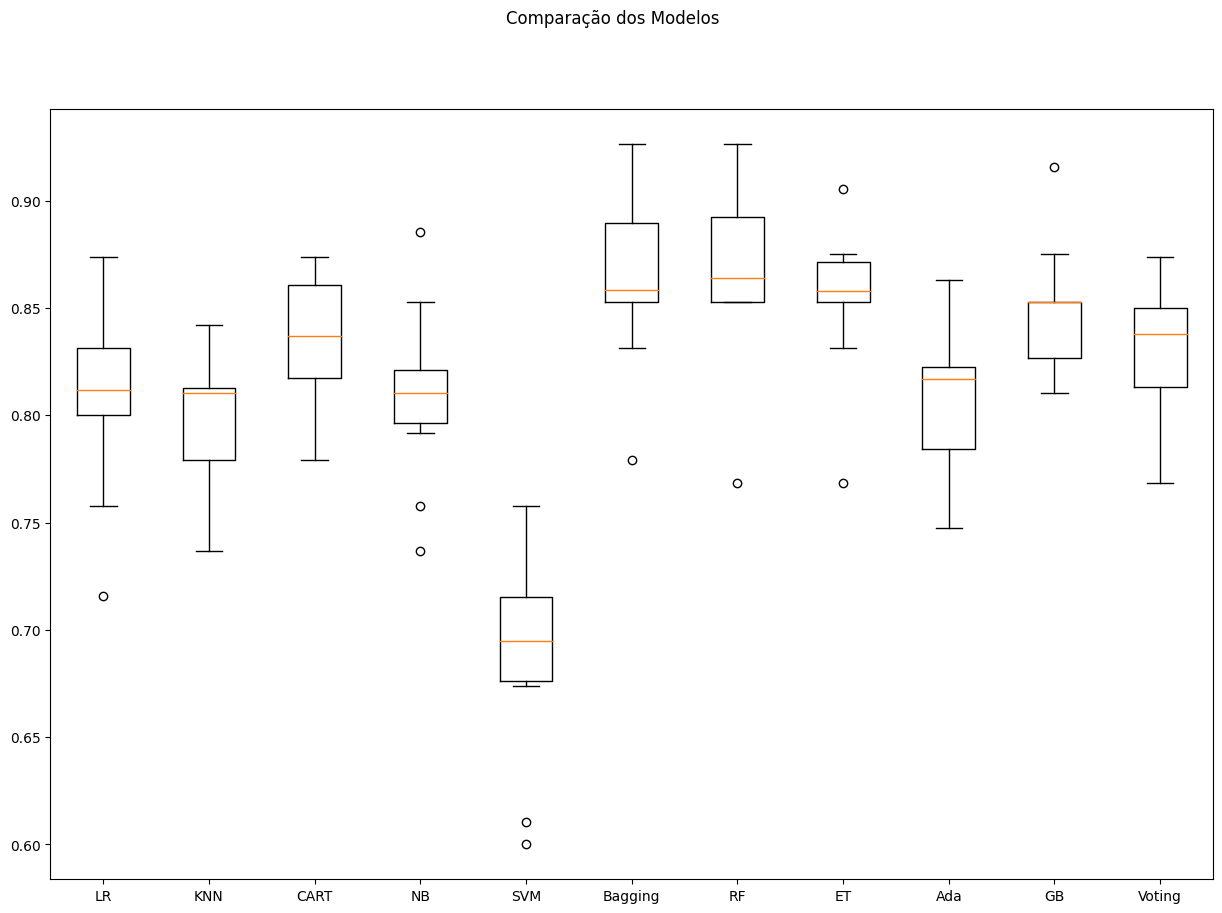

In [69]:
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier

# Definindo uma semente global
np.random.seed(7)

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(base_estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
scoring = 'accuracy'

for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


Decision Tree (CART), Bagging, Random Forest (RF) e Extra Trees (ET) obtiveram as maiores pontuações de acurácia média, com pontuações em torno de 0.83 a 0.87. Isso sugere que esses modelos tiveram um bom desempenho na classificação dos dados.

#Criação e avaliação de modelos: dados padronizados e normalizados

LR-orig: 0.809 (0.043)
KNN-orig: 0.797 (0.032)
CART-orig: 0.835 (0.029)
NB-orig: 0.810 (0.040)
SVM-orig: 0.687 (0.047)
Bag-orig: 0.863 (0.039)
RF-orig: 0.867 (0.041)
ET-orig: 0.854 (0.034)
Ada-orig: 0.809 (0.034)
GB-orig: 0.850 (0.029)
Vot-orig: 0.830 (0.031)
LR-padr: 0.809 (0.042)
KNN-padr: 0.825 (0.032)
CART-padr: 0.841 (0.029)
NB-padr: 0.810 (0.040)
SVM-padr: 0.828 (0.035)
Bag-padr: 0.869 (0.039)
RF-padr: 0.871 (0.045)
ET-padr: 0.852 (0.033)
Ada-padr: 0.809 (0.034)
GB-padr: 0.851 (0.029)
Vot-padr: 0.838 (0.028)
LR-norm: 0.816 (0.035)
KNN-norm: 0.816 (0.024)
CART-norm: 0.837 (0.027)
NB-norm: 0.810 (0.040)
SVM-norm: 0.819 (0.036)
Bag-norm: 0.866 (0.040)
RF-norm: 0.866 (0.042)
ET-norm: 0.853 (0.035)
Ada-norm: 0.809 (0.034)
GB-norm: 0.850 (0.029)
Vot-norm: 0.825 (0.030)


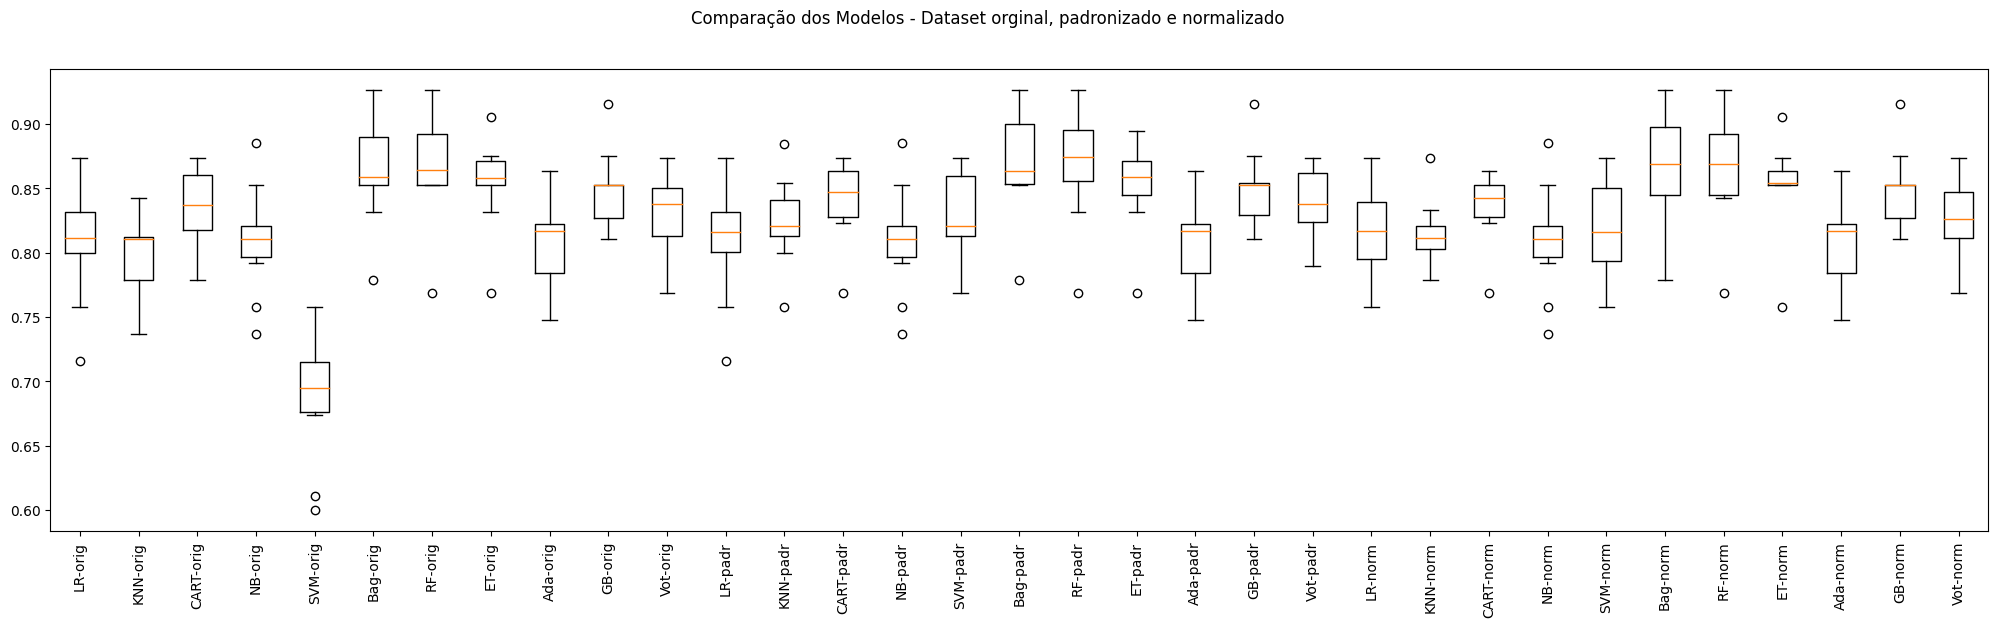

In [70]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []

# Criando os elementos do pipeline

# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(base_estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

# Montando os pipelines

# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()


Os resultados mostram que o Random Forest (RF) obteve consistentemente um desempenho muito bom em todas as três visões do conjunto de dados (original, padronizado e normalizado), com uma precisão média em torno de 0.867, 0.871 e 0.866, respectivamente. Isso sugere que o RF é um modelo robusto e eficaz em lidar com diferentes formas de dados.

# Otimização dos hiperparâmetros

In [78]:
np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
rf = ('RF', RandomForestClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('rf-orig', Pipeline(steps=[rf])))
pipelines.append(('rf-padr', Pipeline(steps=[standard_scaler, rf])))
pipelines.append(('rf-norm', Pipeline(steps=[min_max_scaler, rf])))

param_grid = {
    'RF__n_estimators': [50, 100, 150],
    'RF__max_features': ['auto', 'sqrt', 'log2'],
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))


Sem tratamento de missings: rf-orig - Melhor: 0.871798 usando {'RF__max_features': 'sqrt', 'RF__n_estimators': 100}
Sem tratamento de missings: rf-padr - Melhor: 0.873893 usando {'RF__max_features': 'log2', 'RF__n_estimators': 150}
Sem tratamento de missings: rf-norm - Melhor: 0.870768 usando {'RF__max_features': 'auto', 'RF__n_estimators': 50}


# Finalização do Modelo

In [79]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
rescaledX_train = scaler.transform(X_train) # aplicação da padronização no conjunto de treino
model = LogisticRegression(max_iter=200)
model.fit(rescaledX_train, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledX_test = scaler.transform(X_test) # aplicação da padronização no conjunto de teste
predictions = model.predict(rescaledX_test)
print(accuracy_score(y_test, predictions))


0.8109243697478992


In [83]:
# Preparação do modelo com TODO o dataset

scaler = StandardScaler().fit(X)  # ajuste do scaler com TODO o dataset
rescaledX = scaler.transform(X)  # aplicação da padronização com TODO o dataset
model.fit(rescaledX, y)


LogisticRegression(max_iter=200)

In [84]:
# Novos dados - não sabemos a classe!
data = {'AnginoExercicio':  [1, 0, 1],
        'Depressão_ST_antiga': [2.0, 1.5, 3.0],
        'FreqCardiacaMax': [150, 160, 140],
        'InclinacaoST': [1, 2, 1],
        'TipoDor': [3, 2, 1]
        }

atributos = ['AnginoExercicio', 'Depressão_ST_antiga', 'FreqCardiacaMax', 'InclinacaoST', 'TipoDor']
entrada = pd.DataFrame(data, columns=atributos)

array_entrada = entrada.values
X_entrada = array_entrada[:,0:5].astype(float)

# Criar um novo scaler ajustado aos novos dados
new_scaler = StandardScaler().fit(X_entrada)

# Padronização nos novos dados de entrada usando o novo scaler
rescaledEntradaX = new_scaler.transform(X_entrada)
print(rescaledEntradaX)

[[ 0.70710678 -0.26726124  0.         -0.70710678  1.22474487]
 [-1.41421356 -1.06904497  1.22474487  1.41421356  0.        ]
 [ 0.70710678  1.33630621 -1.22474487 -0.70710678 -1.22474487]]


In [85]:
# Predição de classes dos dados de entrada
saidas = model.predict(rescaledEntradaX)
print(saidas)

[1 0 1]


Atraves dos resultados foi possível definir os melhores modelos para o treinamento da máquina.